<a href="https://colab.research.google.com/github/KaggleStudy4th/4th_kaggle_study/blob/main/%EC%8B%A4%EC%8A%B5%EC%BD%94%EB%93%9C/3%EC%A3%BC%EC%B0%A8/Jiin/11_%EA%B5%B0%EC%A7%91%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-평균을 이용한 붓꽃 데이터 세트 군집화

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris=load_iris()

df=pd.DataFrame(data=iris.data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,random_state=0)
kmeans.fit(df)

KMeans(n_clusters=3, random_state=0)

In [3]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
df['target']=iris.target
df['cluster']=kmeans.labels_
iris_result=df.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


labels_의 값이 0,1,2로 돼 있어며, 이는 각 레코드가 첫 번째 군집, 두번재 군집, 세번째 군집에 속함을 의미한다. 실제 붓꽃 품종 분류 값과 얼마나 차이가 나는지로 군집화가 효과적으로 됐는지 확인해보겠다. 붓꽃 데이터 세트의 target값을 target컬럼으로 앞에서 구한 labels_값을 cluster 칼럼으로 지정해 df에 초가한 뒤에 groupby 연산을 실제 분류값인 target과 군집화 분류값인 cluster레벨로 적용해 target과 cluster 값 개수를 비교할 수 있다.

In [6]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(iris.data)
df['pca_x']=pca_transformed[:,0]
df['pca_y']=pca_transformed[:,1]

df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


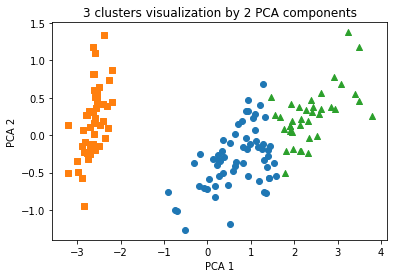

In [7]:
#군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind=df[df['cluster']==0].index
marker1_ind=df[df['cluster']==1].index
marker2_ind=df[df['cluster']==2].index

#군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x,pca_y 값 추출, o,s,^로 마커 표시
plt.scatter(x=df.loc[marker0_ind,'pca_x'],y=df.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=df.loc[marker1_ind,'pca_x'],y=df.loc[marker1_ind,'pca_y'],marker='s')
plt.scatter(x=df.loc[marker2_ind,'pca_x'],y=df.loc[marker2_ind,'pca_y'],marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 clusters visualization by 2 PCA components')
plt.show()

cluster 0과 1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분이 존재한다. 